<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a data-toc-modified-id="Загрузка-и-обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и обзор данных</a></span></li><li><span><a data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span><ul class="toc-item"><li><span><a data-toc-modified-id="Вывод-по-блоку-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод по блоку</a></span></li></ul></li><li><span><a data-toc-modified-id="Построение-модели-прогнозирования-оттока-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Построение модели прогнозирования оттока клиентов</a></span></li><li><span><a data-toc-modified-id="Создание-кластеризации-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Создание кластеризации клиентов</a></span></li><li><span><a data-toc-modified-id="Вывод-и-рекомендация-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод и рекомендация</a></span></li></ul></div>

# Исследования оттока клиентов в сети фитнес-центров «Культурист-датасаентист»

**Информация исследования**

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет

**Цель исследования**

Провести анализ и подготовить план действий по удержанию клиентов

**Описание данных**

Данные клиента за предыдущий до проверки факта оттока месяц:

* `gender` — пол;
* `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
* `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* `Phone` — наличие контактного телефона;
* `Age` — возраст;
* `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах)

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

* `Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
* `Group_visits` — факт посещения групповых занятий;
* `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
* `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
* `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон
* `Churn` — факт оттока в текущем месяце

## 1. Загрузка и обзор данных

In [1]:
# имипорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# выгрузка файла
df = pd.read_csv('/datasets/gym_churn.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
# обзор общих данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Таблица имеет 4000 строк и 14 столбцов

Пропущенных значений не выявлено. Так же не замечено категориальных переменных

## 2. Предобработка данных

In [4]:
# название столбцов приведедены к нижнему регистру 
df.columns = df.columns.str.lower()
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
# преобразованы некоторые столбцы
df['avg_additional_charges_total'] = df['avg_additional_charges_total'].round(2)
df['avg_class_frequency_total'] = df['avg_class_frequency_total'].round(2)
df['avg_class_frequency_current_month'] = df['avg_class_frequency_current_month'].round(2)
df['month_to_end_contract'] = df['month_to_end_contract'].astype('int')
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.23,5,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1,3,1.11,1.12,0


In [6]:
# замена мест столбцов
df = df[[
    'gender',
    'near_location', 
    'partner', 
    'promo_friends', 
    'phone',
    'age',
    'lifetime',
    'contract_period',
    'month_to_end_contract',
    'group_visits',
    'avg_class_frequency_total',
    'avg_class_frequency_current_month',
    'avg_additional_charges_total',
    'churn'
]]
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
gender,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00
near_location,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
partner,1.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00
promo_friends,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00
phone,0.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00
age,29.00,31.00,28.00,33.00,26.00,34.00,32.00,30.00,23.00,31.00
lifetime,3.00,7.00,2.00,2.00,3.00,3.00,2.00,0.00,1.00,11.00
contract_period,6.00,12.00,1.00,12.00,1.00,1.00,6.00,1.00,1.00,1.00
month_to_end_contract,5.00,12.00,1.00,12.00,1.00,1.00,6.00,1.00,1.00,1.00
group_visits,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00


## 3. Исследовательский анализ данных (EDA)

In [7]:
# обзор статистических данных
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.51,0.50,0.00,0.00,1.00,1.00,1.00
near_location,4000.0,0.85,0.36,0.00,1.00,1.00,1.00,1.00
partner,4000.0,0.49,0.50,0.00,0.00,0.00,1.00,1.00
promo_friends,4000.0,0.31,0.46,0.00,0.00,0.00,1.00,1.00
phone,4000.0,0.90,0.30,0.00,1.00,1.00,1.00,1.00
age,4000.0,29.18,3.26,18.00,27.00,29.00,31.00,41.00
lifetime,4000.0,3.72,3.75,0.00,1.00,3.00,5.00,31.00
contract_period,4000.0,4.68,4.55,1.00,1.00,1.00,6.00,12.00
month_to_end_contract,4000.0,4.32,4.19,1.00,1.00,1.00,6.00,12.00
group_visits,4000.0,0.41,0.49,0.00,0.00,0.00,1.00,1.00


**Выводы**

* Мужчин и женщин распределено поровну
* В большей степени клиенты работают или проживают рядом с фитнес-центром
* Сотрудников компании-партнёра насчитывается около 50%
* В акции приянли участие 31%
* Почти у всех клиентов есть наличие контактного телефона
* Средний возраст клиентов - 29 лет
* В среднем клиенты обращаются в течение 3.5 месяца после первого обращения
* В среднем абонементом пользуются 4.5 месяца
* В среднем срок окончания абонемента 4 месяца 
* Около 40% клиентов ходят на груповые занятия
* В среднем клиенты посещают зал 2 раза в неделю
* В среднем клиенты посещают зал 2 раза в неделю за предыдущий месяц
* В среднем суммарная вырука за дополнительные услуги - 147 (неизвестно)
* Клиентов ушло около 27%

In [8]:
# обзор статистических данных на оставшийся клиентов
df.query('churn == 0').describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
gender,2939.0,0.51,0.50,0.00,0.00,1.00,1.00,1.00
near_location,2939.0,0.87,0.33,0.00,1.00,1.00,1.00,1.00
partner,2939.0,0.53,0.50,0.00,0.00,1.00,1.00,1.00
promo_friends,2939.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00
phone,2939.0,0.90,0.30,0.00,1.00,1.00,1.00,1.00
age,2939.0,29.98,3.01,19.00,28.00,30.00,32.00,41.00
lifetime,2939.0,4.71,3.87,0.00,2.00,4.00,6.00,31.00
contract_period,2939.0,5.75,4.72,1.00,1.00,6.00,12.00,12.00
month_to_end_contract,2939.0,5.28,4.36,1.00,1.00,6.00,10.00,12.00
group_visits,2939.0,0.46,0.50,0.00,0.00,0.00,1.00,1.00


In [9]:
# обзор статистических данных на ушедших клиентов
df.query('churn == 1').describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
gender,1061.0,0.51,0.50,0.00,0.00,1.00,1.00,1.00
near_location,1061.0,0.77,0.42,0.00,1.00,1.00,1.00,1.00
partner,1061.0,0.36,0.48,0.00,0.00,0.00,1.00,1.00
promo_friends,1061.0,0.18,0.39,0.00,0.00,0.00,0.00,1.00
phone,1061.0,0.90,0.30,0.00,1.00,1.00,1.00,1.00
age,1061.0,26.99,2.90,18.00,25.00,27.00,29.00,38.00
lifetime,1061.0,0.99,1.11,0.00,0.00,1.00,1.00,9.00
contract_period,1061.0,1.73,2.13,1.00,1.00,1.00,1.00,12.00
month_to_end_contract,1061.0,1.66,1.96,1.00,1.00,1.00,1.00,12.00
group_visits,1061.0,0.27,0.44,0.00,0.00,0.00,1.00,1.00


**Выводы**

* Распределение по полу никак не различатеся между оставшийся и ушедших клиентов
* На 10% больше оставшийся клиентов, которые работают или проживают рядом с фитнес-центром, чем у ушедших
* На 17% больше насчитывается сотрудников компании-партнёра у оставшийся клиентов, чем у ушедших
* В акции почти в два раза больше приняли оставшийся клиенты, чем ушедшие
* Наличие контактного телефона никак не различается
* В среднем уходят клиенты 27 лет, а остаются от 30 лет
* Ушедшие клиенты обращаются намного быстрее, чем оставшийся

Все остальные показатели на основе журнала посещений намного меньше у ушедших клиентов, чем у оставшийся

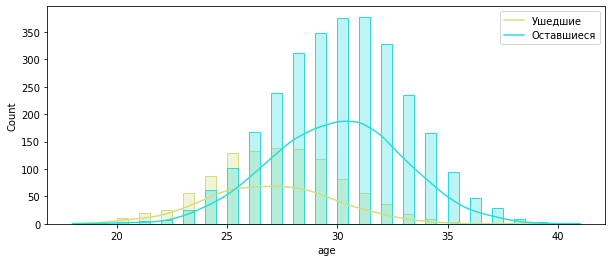

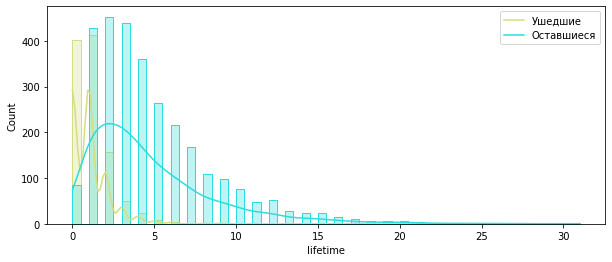

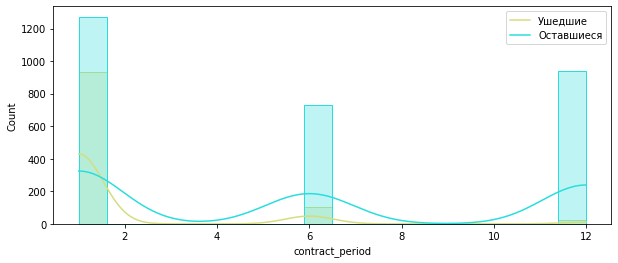

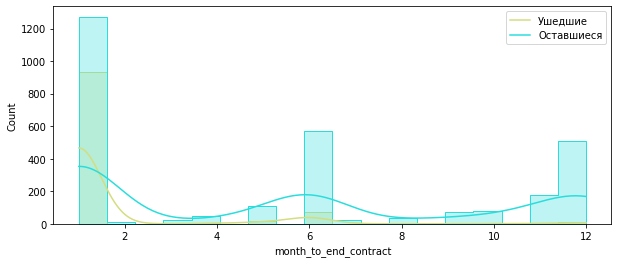

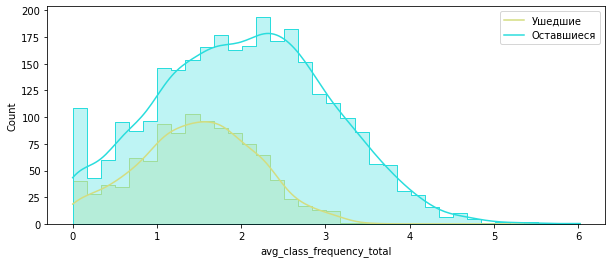

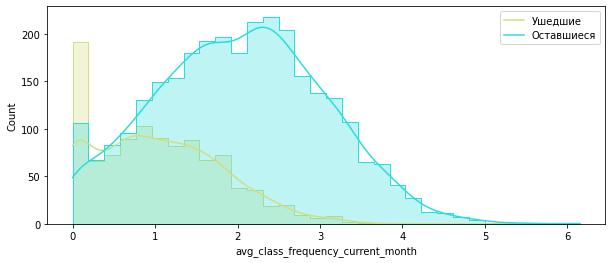

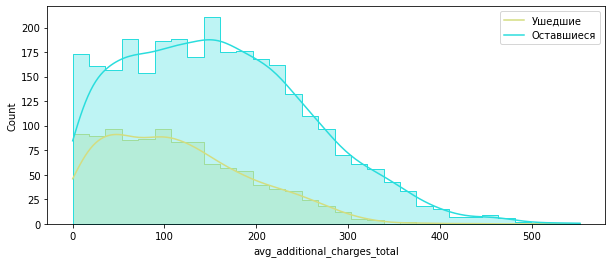

In [10]:
# построены диаграммы для количественных перемен
categorical = ['age', 
               'lifetime', 
               'contract_period', 
               'month_to_end_contract', 
               'avg_class_frequency_total', 
               'avg_class_frequency_current_month', 
               'avg_additional_charges_total']

for column in categorical: 
    plt.figure(figsize=(10,4)) 
    sns.histplot(x=column, hue='churn', data=df, element='step', alpha=0.3, palette='rainbow', kde=True)
    plt.legend(['Ушедшие', 'Оставшиеся'])
    plt.show()

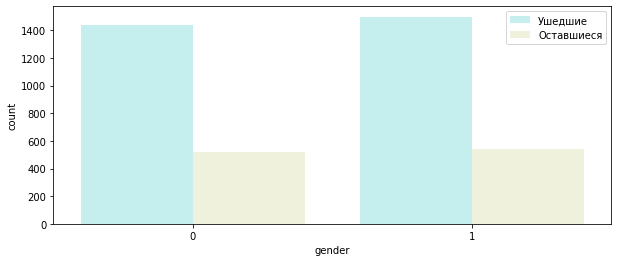

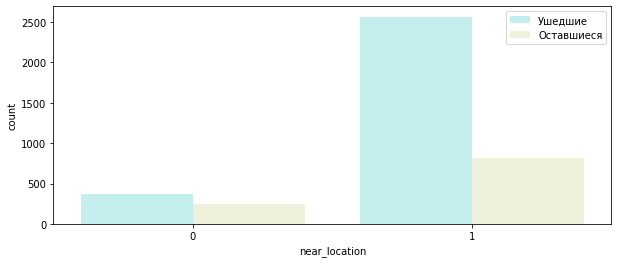

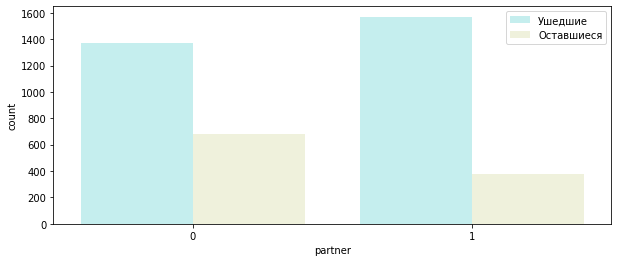

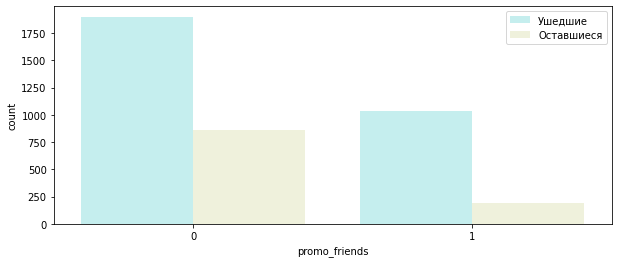

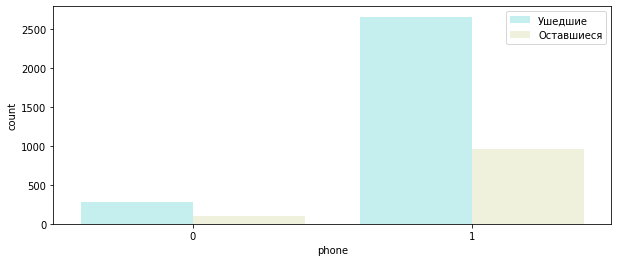

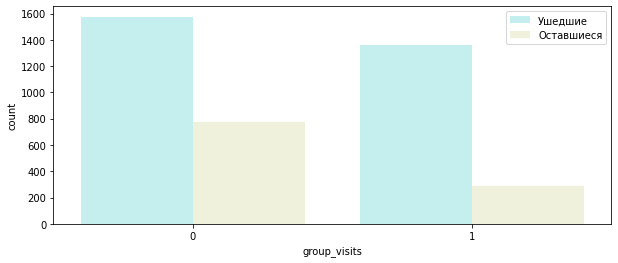

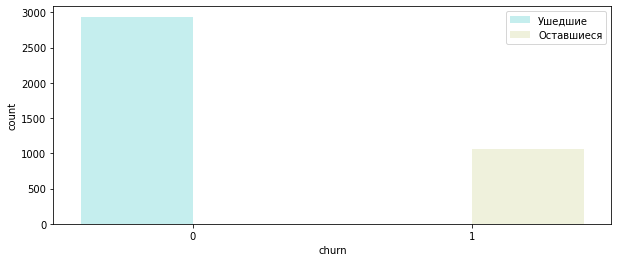

In [11]:
# построены стобчатые диаграммы для катогориальных перемен
quantitative = ['gender', 
                'near_location', 
                'partner', 
                'promo_friends', 
                'phone', 
                'group_visits', 
                'churn']

for column in quantitative: 
    plt.figure(figsize=(10,4)) 
    sns.countplot(x=column, hue='churn', data=df, alpha=0.3, palette='rainbow')
    plt.legend(['Ушедшие', 'Оставшиеся'])
    plt.show()

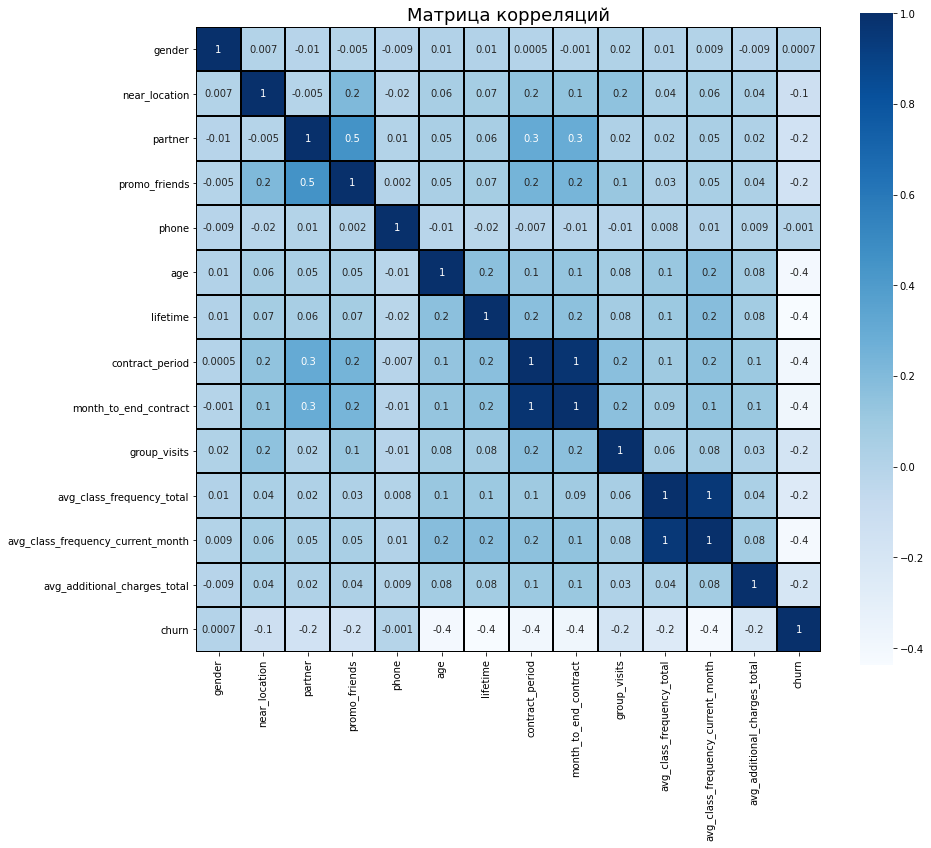

In [15]:
# построена матрица корреляций
cm = df.corr()
plt.figure(figsize=(14, 12))
plt.title('Матрица корреляций', fontsize=18)
sns.heatmap(cm, annot=True, square=True, fmt='.1g', cmap='Blues', linewidths=1, linecolor='black');

**Вывод**

По матрицы видно, что очень хорошо коррелируется между собой contract_period и month_to_end_contract, avg_class_frequency_total и avg_class_frequency_current_month

### 3.1 Вывод по блоку

Обзор статистических данных:

* Мужчин и женщин распределено поровну
* В большей степени клиенты работают или проживают рядом с фитнес-центром
* Сотрудников компании-партнёра насчитывается около 50%
* В акции приянли участие 31%
* Почти у всех клиентов есть наличие контактного телефона
* Средний возраст клиентов - 29 лет
* В среднем клиенты обращаются в течение 3.5 месяца после первого обращения
* В среднем абонементом пользуются 4.5 месяца
* В среднем срок окончания абонемента 4 месяца 
* Около 40% клиентов ходят на груповые занятия
* В среднем клиенты посещают зал 2 раза в неделю
* В среднем клиенты посещают зал 2 раза в неделю за предыдущий месяц
* В среднем суммарная вырука за дополнительные услуги - 147 (неизвестно)
* Клиентов ушло около 27%

Обзор статистических данных между оставшимися и ушедшими клентами:

* Распределение по полу никак не различатеся между оставшийся и ушедших клиентов
* На 10% больше оставшийся клиентов, которые работают или проживают рядом с фитнес-центром, чем у ушедших
* На 17% больше насчитывается сотрудников компании-партнёра у оставшийся клиентов, чем у ушедших
* В акции почти в два раза больше приняли оставшийся клиенты, чем ушедшие
* Наличие контактного телефона никак не различается
* В среднем уходят клиенты 27 лет, а остаются от 30 лет
* Ушедшие клиенты обращаются намного быстрее, чем оставшийся

Все остальные показатели на основе журнала посещений намного меньше у ушедших клиентов, чем у оставшихся

## 4. Построение модели прогнозирования оттока клиентов

In [16]:
# разделение данных на признаки (матрица X) и целевую переменную (y)
X = df.drop(['churn'], axis=1)
y = df['churn']

# разделение модели на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# обучение StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# преобразование обучающих и валидационных наборов данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [17]:
# задан алгоритм для модели логистической регрессии
model = LogisticRegression(solver='liblinear', random_state=0)

# обучение модели
model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
predictions = model.predict(X_test_st)
probabilities = model.predict_proba(X_test_st)[:, 1]

# вывод метрик
print('Метрики для модели логистической регрессии')
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.3f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.3f}'.format(recall_score(y_test, predictions)))

# задан алгоритм для модели случайного леса
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# обучение модели
rf_model.fit(X_train, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

# вывод метрик
print()
print('Метрики для модели случайного леса')
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.3f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.3f}'.format(recall_score(y_test, rf_predictions)))

Метрики для модели логистической регрессии
Accuracy: 0.922
Precision: 0.854
Recall: 0.828

Метрики для модели случайного леса
Accuracy: 0.919
Precision: 0.845
Recall: 0.823


Модели имееют почти одинаковые значения по метрикам, но немного лучше показала себя модель логистической регрессии

## 5. Создание кластеризации клиентов

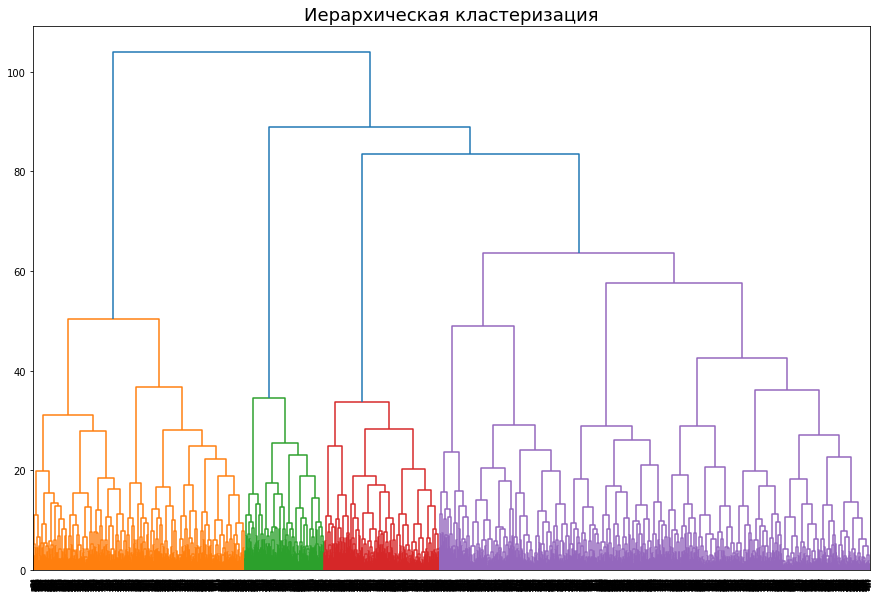

In [18]:
# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method='ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация', fontsize=18)
plt.show() 

На графике 4 цвета, значит насчитывается 4 кластера

In [19]:
# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(X)
# задано число кластеров (4) и фиксируем значение random_state для воспроизводимости результата
km = KMeans(n_clusters=5, random_state=0)
# применён алгоритм к данным
labels = km.fit_predict(X_sc)
df['cluster'] = labels

In [20]:
# выведены число уникальных значений каждого кластера
df['cluster'].value_counts()

1    1259
3    1003
4     848
0     505
2     385
Name: cluster, dtype: int64

Всех больше клиентов насчитывается в 1 кластере

In [21]:
# посчитано среднее значение по кластерам для каждого признака
df.groupby('cluster').mean().T.round(2)

cluster,0,1,2,3,4
gender,0.50,0.48,0.52,0.50,0.56
near_location,0.00,1.00,0.86,0.96,0.98
partner,0.46,0.35,0.47,0.78,0.36
promo_friends,0.08,0.24,0.31,0.57,0.24
phone,1.00,1.00,0.00,1.00,1.00
age,28.48,28.17,29.30,29.99,30.11
lifetime,2.81,2.43,3.92,4.75,4.89
contract_period,2.35,1.95,4.79,10.92,2.69
month_to_end_contract,2.20,1.86,4.48,9.98,2.48
group_visits,0.22,0.34,0.43,0.55,0.47


**Выводы по кластерам**

**0 кластер**

* клиенты не проживают и не работают возле офиса
* имеет самый маленький процент (8%) по проме акции
* отток клиентов 44%

**1 кластер**

* в основном клиенты берут абонемент на 2 месяца
* наименьшее кол-во посещений за последний месяц
* самый большой отток клиентов 52%

**2 кластер**

* нет мобильного телефона
* отток клиентов 27%

**3 кластер**

* преобладают сотрудники компаний-партнеров
* абонементы в среднем берут на 10 месяцев
* самый маленький отток клиентов 3%

**4 кластер**

* всех больше посещают занятия в неделю - 3 раза
* отток клиентов 7%

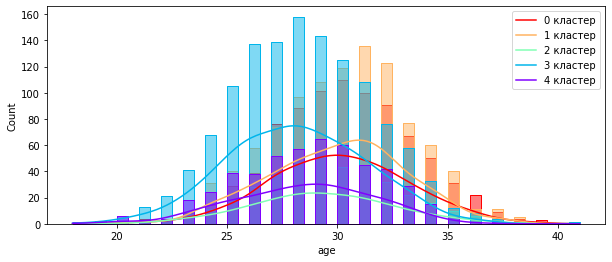

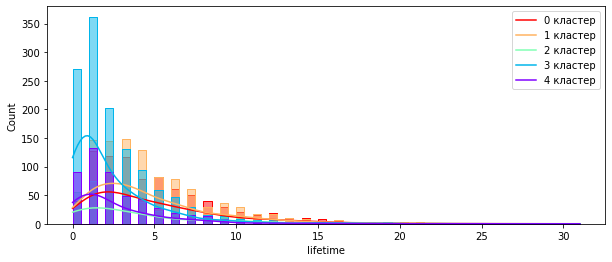

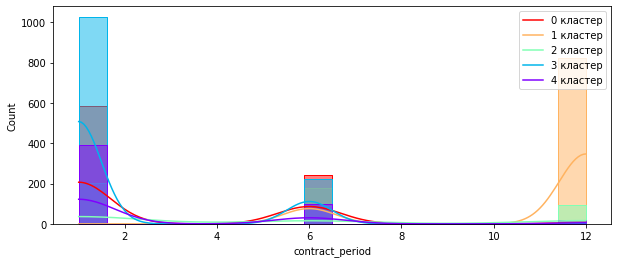

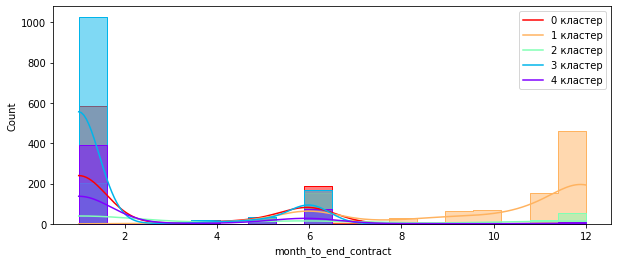

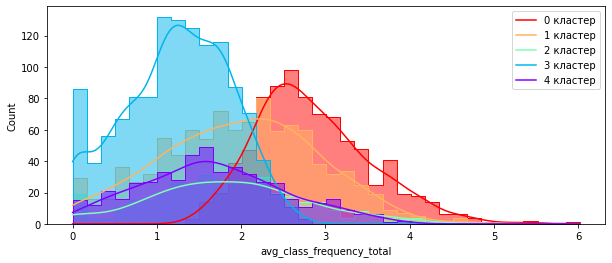

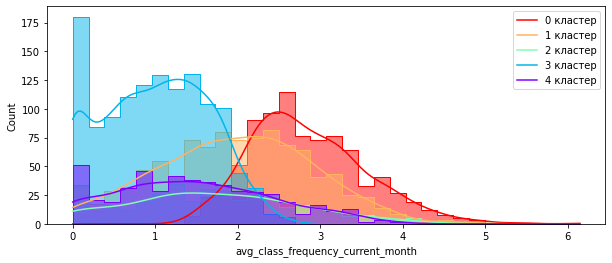

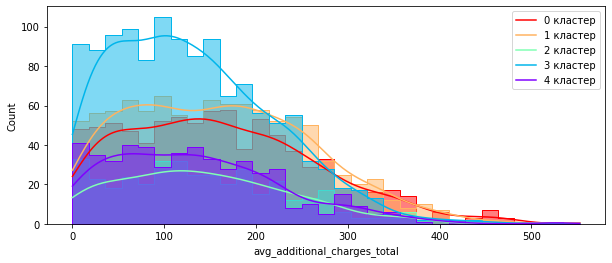

In [22]:
# построены диаграммы для количественных перемен
categorical = ['age', 
               'lifetime', 
               'contract_period', 
               'month_to_end_contract', 
               'avg_class_frequency_total', 
               'avg_class_frequency_current_month', 
               'avg_additional_charges_total']

for column in categorical: 
    plt.figure(figsize=(10,4)) 
    sns.histplot(x=column, hue='cluster', data=df, element='step', alpha=0.5, palette='rainbow', kde=True)
    plt.legend(['0 кластер', '1 кластер', '2 кластер', '3 кластер', '4 кластер'])
    plt.show()

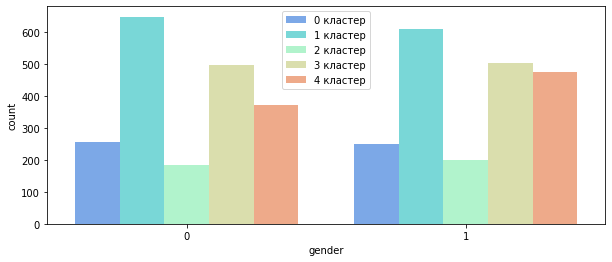

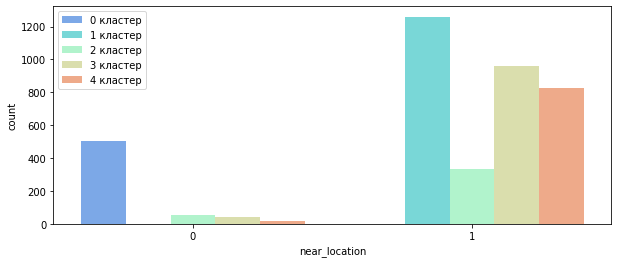

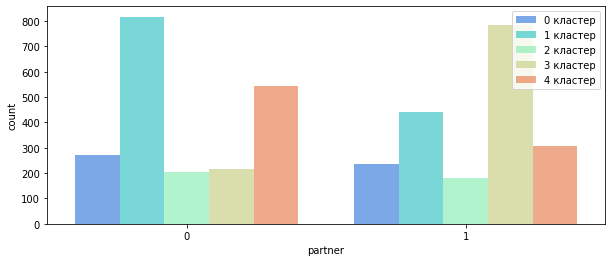

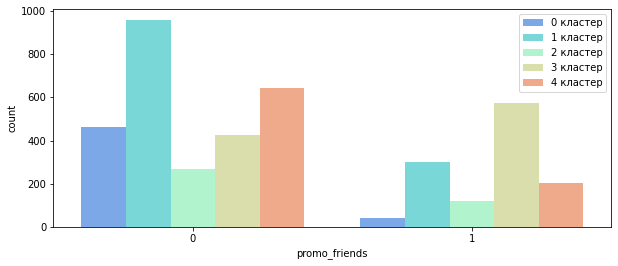

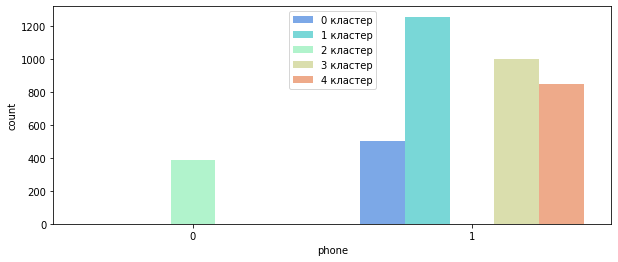

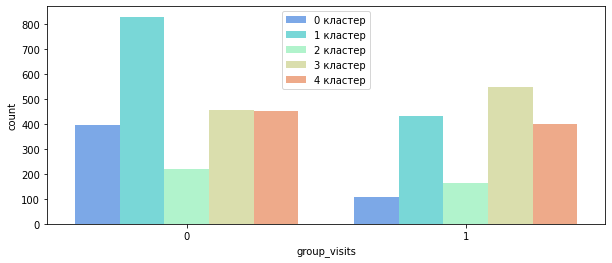

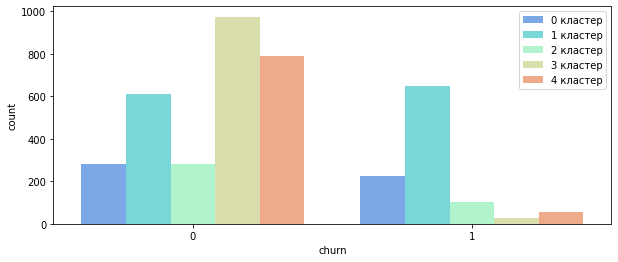

In [23]:
# построены стобчатые диаграммы для катогориальных перемен
quantitative = ['gender', 
                'near_location', 
                'partner', 
                'promo_friends', 
                'phone', 
                'group_visits', 
                'churn']

for column in quantitative: 
    plt.figure(figsize=(10,4)) 
    sns.countplot(x=column, hue='cluster', data=df, alpha=0.7, palette='rainbow')
    plt.legend(['0 кластер', '1 кластер', '2 кластер', '3 кластер', '4 кластер'])
    plt.show()

## 6. Вывод и рекомендация

Лучше всего продовать долгосрочные абонементы, т.к на них показывается самый маленький отток клиентов. За счёт этого с большей вероятностью клиенты будут пользоваться и другими услугами фитнесс-клуба. Рекомендация для удержании клиентов: следует ввести новые способы, чтобы клиенты покупали долгосрочные абонементы, а не краткосрочные 